# Solar Model

Date of creation: 17.06.2020

Last updated: 2.07.2020

In [1]:
import math
import numpy as np
import pandas as pd

%matplotlib inline

import matplotlib as mpl
import matplotlib.pyplot as plt

In [2]:
h = 1.054E-27 # reduced Planck constant
c = 3e10 # speed of light
G = 6.67E-8 # gravitational constant
kB = 1.381E-16 # Boltzmann constant
m_prot = 1.67E-24 # масса протона
m_elec = 9.11E-28 # масса электрона
alpha = 137 # e2/h/c - постоянная тонкой структуры
e2 = h*c/alpha
r_elec = e2/m_elec/c/c # классический радиус электрона
pi = math.pi # 3.14...
sigmaT = 8*pi/3*r_elec*r_elec # сечение томсоновского рассеяния на электронах
kappaT = sigmaT/m_prot
sigma = pow(pi, 2)*pow(kB, 4)/60*pow(h, -3)*pow(c, -2) # sigma*T^4
a = pow(pi, 2)*pow(kB, 4)/15*pow(h, -3)*pow(c, -3)
gamma = 5/3
year = 365.25*24*3600 # seconds in a year
eVolt = 1.6e-12 # ergs
dEpp = (26.23 - 0.5)*1e6*eVolt # energy output in (4p -> He) reaction minus neutrinos energy

In [3]:
M_sol = 1.99e33 # solar mass
R_sol = 6.96e10 # solar radius
L_sol = 3.85e33 # solar luminosity
Teff = pow(L_sol/4/pi/sigma/R_sol/R_sol, 1/4) # 5780 solar surface temperature

## Функции для модели

In [4]:
# Эволюция содержания водорода
dimM = 200
dimT = 50
Xpre = 0.732
xmt = np.full((dimM, dimT), Xpre)
epoch = 0 # 0 - dimT-1 

In [5]:
epoch = 0

In [6]:
# Интерполяция содержания водорода для данной массы
def XYZ(M, Z=0.02, dimM=200) :
    i = int(M*dimM)
    if i > dimM - 1 :
        i = dimM - 1
    X = xmt[i, epoch]
    return (X, 1-Z-X, Z)

In [7]:
# for i in range(100):
#     xmt[i, epoch] = 0.

In [8]:
xmt[:,epoch]

array([0.732, 0.732, 0.732, 0.732, 0.732, 0.732, 0.732, 0.732, 0.732,
       0.732, 0.732, 0.732, 0.732, 0.732, 0.732, 0.732, 0.732, 0.732,
       0.732, 0.732, 0.732, 0.732, 0.732, 0.732, 0.732, 0.732, 0.732,
       0.732, 0.732, 0.732, 0.732, 0.732, 0.732, 0.732, 0.732, 0.732,
       0.732, 0.732, 0.732, 0.732, 0.732, 0.732, 0.732, 0.732, 0.732,
       0.732, 0.732, 0.732, 0.732, 0.732, 0.732, 0.732, 0.732, 0.732,
       0.732, 0.732, 0.732, 0.732, 0.732, 0.732, 0.732, 0.732, 0.732,
       0.732, 0.732, 0.732, 0.732, 0.732, 0.732, 0.732, 0.732, 0.732,
       0.732, 0.732, 0.732, 0.732, 0.732, 0.732, 0.732, 0.732, 0.732,
       0.732, 0.732, 0.732, 0.732, 0.732, 0.732, 0.732, 0.732, 0.732,
       0.732, 0.732, 0.732, 0.732, 0.732, 0.732, 0.732, 0.732, 0.732,
       0.732, 0.732, 0.732, 0.732, 0.732, 0.732, 0.732, 0.732, 0.732,
       0.732, 0.732, 0.732, 0.732, 0.732, 0.732, 0.732, 0.732, 0.732,
       0.732, 0.732, 0.732, 0.732, 0.732, 0.732, 0.732, 0.732, 0.732,
       0.732, 0.732,

### Поиск комбинации центральных плотности и температуры, дающих решение с массой равной солнечной. (Первый вариант)

Для интегрирования уравнений из центра надо задать плотность и температуру в центре, но только одна их комбинации 
соответствует решению с массой, равной солнечной (при фиксированном хим. составе)

Внешний цикл по температурам, внутренний цикл - по плотности.
При фиксированной температуре постепенно повышаем плотность, пока не появится стабильное решение с массой < 1.
После этого возвращаемся на 1 шаг назад по плотности, уменьшаем шаг по плотности в 10 раз и повторям процедуру.
Так делаем пока шаг по плотности не станет меньше 1e-8.

In [50]:
%%time
dim = 11
for j in range(dim) :
    T0 = 1.30e7 + 0.01e7*j
    step = 10 # step by density
    exc = True
    den0 = 90
    if j > 0:
        df_prev = df.copy()
    while step > 1e-8 :    
        for i in range(10) :
            try :
                n, M, R, L, T, df = model_R(den0, T0, debug=False)
            except Exception as error:
#                 print(T0, den0, 'Caught this error: ' + repr(error))
                exc = True
                den0 += step
                break
            if exc :
                exc = False
                print('\tT0=%.5e D0=%.10f n=%d M=%.4f R=%.4f L=%.4f T=%.0f' % (T0, den0, n, M/M_sol, R/R_sol, L/L_sol, T))
                den0 -= step
                step /= 10.
                break
            
    print('# T0=%.5e D0=%.2f n=%d M=%.4f R=%.4f L=%.3f T=%.0f' % (T0, den0, n, M/M_sol, R/R_sol, L/L_sol, T))
    if M/M_sol > 1. :
#         df = df_prev
        break
print("Done!")

	T0=1.30000e+07 D0=100.0000000000 n=10174 M=0.6660 R=0.3829 L=0.4632 T=7700
	T0=1.30000e+07 D0=93.0000000000 n=10485 M=0.7540 R=0.4238 L=0.5099 T=7494
	T0=1.30000e+07 D0=92.5000000000 n=11073 M=0.8429 R=0.4862 L=0.5396 T=7100
	T0=1.30000e+07 D0=92.5000000000 n=11073 M=0.8429 R=0.4862 L=0.5396 T=7100
	T0=1.30000e+07 D0=92.4960000000 n=11330 M=0.8451 R=0.4883 L=0.5400 T=7087
	T0=1.30000e+07 D0=92.4951000000 n=11885 M=0.8456 R=0.4890 L=0.5401 T=7082
	T0=1.30000e+07 D0=92.4951000000 n=11885 M=0.8456 R=0.4890 L=0.5401 T=7082
	T0=1.30000e+07 D0=92.4950940000 n=11989 M=0.8456 R=0.4891 L=0.5401 T=7082
	T0=1.30000e+07 D0=92.4950934000 n=12018 M=0.8456 R=0.4891 L=0.5401 T=7082
	T0=1.30000e+07 D0=92.4950933500 n=12024 M=0.8456 R=0.4891 L=0.5401 T=7082
# T0=1.30000e+07 D0=92.50 n=12024 M=0.8456 R=0.4891 L=0.540 T=7082
	T0=1.31000e+07 D0=100.0000000000 n=10181 M=0.6737 R=0.3843 L=0.4848 T=7772
	T0=1.31000e+07 D0=94.0000000000 n=10400 M=0.7382 R=0.4131 L=0.5216 T=7638
	T0=1.31000e+07 D0=93.200000000

	T0=1.40000e+07 D0=99.0000000000 n=10579 M=0.8465 R=0.4428 L=0.8342 T=8290
	T0=1.40000e+07 D0=98.8000000000 n=10882 M=0.9024 R=0.4830 L=0.8558 T=7989
	T0=1.40000e+07 D0=98.7600000000 n=11134 M=0.9318 R=0.5113 L=0.8617 T=7784
	T0=1.40000e+07 D0=98.7560000000 n=11524 M=0.9365 R=0.5167 L=0.8624 T=7745
	T0=1.40000e+07 D0=98.7557000000 n=11722 M=0.9369 R=0.5173 L=0.8625 T=7741
	T0=1.40000e+07 D0=98.7556600000 n=11782 M=0.9370 R=0.5174 L=0.8625 T=7740
	T0=1.40000e+07 D0=98.7556510000 n=11799 M=0.9370 R=0.5174 L=0.8625 T=7740
	T0=1.40000e+07 D0=98.7556505000 n=11800 M=0.9370 R=0.5174 L=0.8625 T=7740
	T0=1.40000e+07 D0=98.7556504100 n=11800 M=0.9370 R=0.5174 L=0.8625 T=7740
# T0=1.40000e+07 D0=98.76 n=11800 M=0.9370 R=0.5174 L=0.862 T=7740
Done!
Wall time: 10min 29s


In [10]:
# Выбираем либо последнюю итерацию (M > 1) или предпоследнюю (M < 1) - в зависимости какая ближе к 1.
# df = df_prev
df

NameError: name 'df' is not defined

In [13]:
# сохраняем модель для данной эпохи.
_ = df.to_csv(line_terminator='\n')
filename = "1epoch%02d.csv" % epoch
print(filename)
csv_file = open(filename, "wt")
n = csv_file.write(_)
csv_file.close()

1epoch00.csv


### Поиск комбинации центральных плотности и температуры, дающих решение с массой равной солнечной. (Второй вариант)

Для интегрирования уравнений из центра надо задать плотность и температуру в центре, но только одна их комбинации соответствует решению с массой, равной солнечной (при фиксированном хим. составе)

Альтернативный поиск (в обратном порядке)

Внешний цикл по плотности, внутренний цикл - по температуре. При фиксированной плотности постепенно понижаем температуру, пока не появится стабильное решение с массой < 1. После этого возвращаемся на 1 шаг назад по температуре, уменьшаем шаг по температуре в 10 раз и повторям процедуру. Так делаем пока шаг по температуре не станет меньше 0.01 градуса.

In [ ]:
%%time
# Another order of fit - density outside
dim = 11
for j in range(dim) :
    den0 = 1000 + 100*j # 94.4 + 0.1*j
    step = 1e6 # step for Temperature
    exc = True
    T0 = 30e6
    if j > 0:
        df_prev = df.copy()
    while step > 1e-2 :    
        for i in range(10) :
            try :
                n, M, R, L, T, df = model_R(den0, T0, debug=False)
            except Exception as error:
#                 print(T0, den0, 'Caught this error: ' + repr(error))
                exc = True
                T0 -= step
                break
            if exc :
                exc = False
                print('\tT0=%.5f D0=%.10f n=%d M=%.4f R=%.4f L=%.4f T=%.0f' % (T0, den0, n, M/M_sol, R/R_sol, L/L_sol, T))
                T0 += step
                step /= 10.
                break
            
    print('# T0=%.5f D0=%.2f n=%d M=%.4f R=%.4f L=%.3f T=%.0f' % (T0, den0, n, M/M_sol, R/R_sol, L/L_sol, T))
    if M/M_sol > 1. :
#         df = df_prev
        break
print("Done!")

In [14]:
# Выбираем либо последнюю итерацию (M > 1) или предпоследнюю (M < 1) - в зависимости какая ближе к 1.
# df = df_prev
df

NameError: name 'df' is not defined

In [15]:
# сохраняем модель для данной эпохи.
_ = df.to_csv(line_terminator='\n')
filename = "2epoch%02d.csv" % epoch
print(filename)
csv_file = open(filename, "wt")
n = csv_file.write(_)
csv_file.close()

NameError: name 'df' is not defined

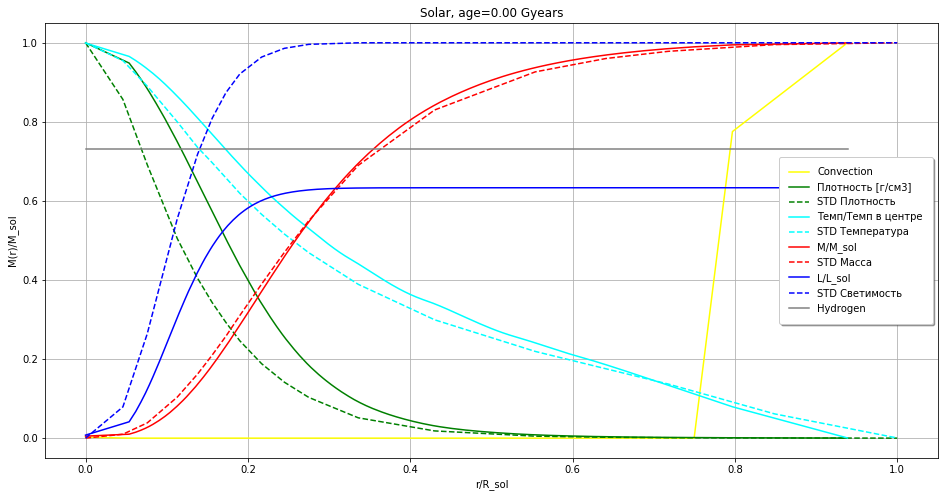

In [111]:
plt.figure(figsize=(16, 8))
ax = plt.axes()
plt.plot(df['Radius']/R_sol, df['Convection'], color='yellow', label='Convection')
plt.plot(df['Radius']/R_sol, df['Density']/df['Density'][0], color='green', label='Плотность [г/см3]')
plt.plot(r1, d1/156.3, '--', color='green', label='STD Плотность')
plt.plot(df['Radius']/R_sol, df['Temperature']/T0, color='cyan', label='Темп/Темп в центре')
plt.plot(r1, t1/15.5e6, '--', color='cyan', label='STD Температура')
plt.plot(df['Radius']/R_sol, df['Mass']/M_sol, color='red', label='M/M_sol')
plt.plot(r1, m1, '--', color='red', label='STD Масса')
# plt.plot(df['Radius']/R_sol, data[4]/data[4][0], color='gray', label='Давл/Давл в центре')
plt.plot(df['Radius']/R_sol, df['Luminosity']/L_sol, color='blue', label='L/L_sol')
plt.plot(r1, l1, '--', color='blue', label='STD Светимость')
plt.plot(df['Radius']/R_sol, df['Hydrogen'], color='gray', label='Hydrogen')
# plt.xlim(0, 1.2)
# plt.ylim(0, 1.1)
plt.xlabel('r/R_sol')
plt.ylabel('M(r)/M_sol')
plt.title('Solar, age=%.2f Gyears' % epoch)
ax.grid(b=True, which='both')

ax.legend(fancybox=True, framealpha=1, shadow=True, borderpad=1);

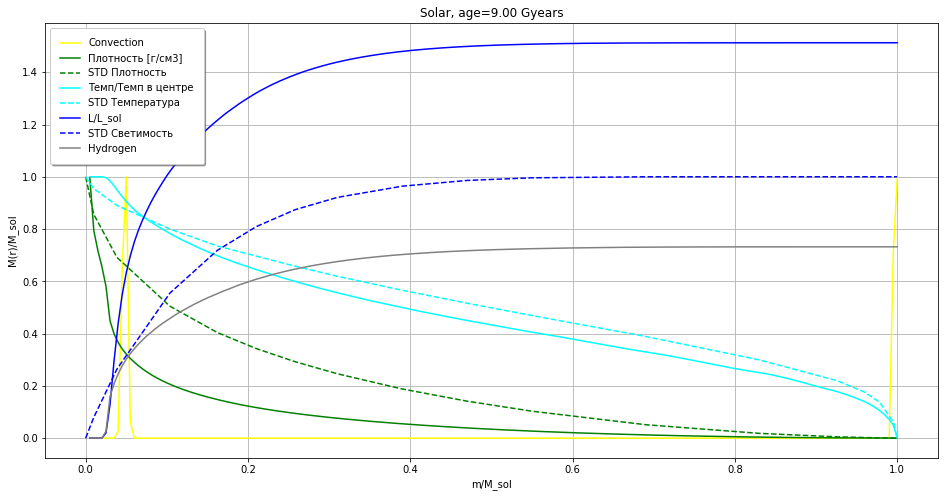

In [831]:
plt.figure(figsize=(16, 8))
ax = plt.axes()
plt.plot(df['Mass']/M_sol, df['Convection'], color='yellow', label='Convection')
plt.plot(df['Mass']/M_sol, df['Density']/df['Density'][0], color='green', label='Плотность [г/см3]')
plt.plot(M1, den1/156.3, '--', color='green', label='STD Плотность')
plt.plot(df['Mass']/M_sol, df['Temperature']/T0, color='cyan', label='Темп/Темп в центре')
plt.plot(M1, T1/15.5e6, '--', color='cyan', label='STD Температура')
# plt.plot(df['Mass']/M_sol, df['Mass']/M_sol, color='red', label='M/M_sol')
# plt.plot(M1, M1, '--', color='red', label='STD Масса')
# plt.plot(df['Radius']/R_sol, data[4]/data[4][0], color='gray', label='Давл/Давл в центре')
plt.plot(df['Mass']/M_sol, df['Luminosity']/L_sol, color='blue', label='L/L_sol')
plt.plot(M1, L1, '--', color='blue', label='STD Светимость')
plt.plot(df['Mass']/M_sol, df['Hydrogen'], color='gray', label='Hydrogen')
# plt.xlim(0, 1.2)
# plt.ylim(0, 1.1)
plt.xlabel('m/M_sol')
plt.ylabel('M(r)/M_sol')
plt.title('Solar, age=%.2f Gyears' % epoch)
ax.grid(b=True, which='both')

ax.legend(fancybox=True, framealpha=1, shadow=True, borderpad=1);

In [793]:
df = pd.read_csv('Zeld/epoch07.csv')

In [829]:
# update X 
step_t = 1e9*year # step by time
for j in range(len(df['Mass'])):
    xmt[j, epoch + 1] = df['Hydrogen'][j] * math.exp(step_t/df['Tau'][j])

dX=0.000000e+00 add=0.000000e+00
dX=0.000000e+00 add=0.000000e+00
dX=0.000000e+00 add=0.000000e+00
dX=0.000000e+00 add=0.000000e+00
dX=7.698856e-02 add=0.000000e+00
dX=3.095265e-01 add=5.085097e-02
dX=2.668596e-01 add=2.013283e-01
dX=2.094357e-01 add=2.598947e-01
dX=1.607200e-01 add=2.233531e-01
dX=1.264018e-01 add=1.073062e-01


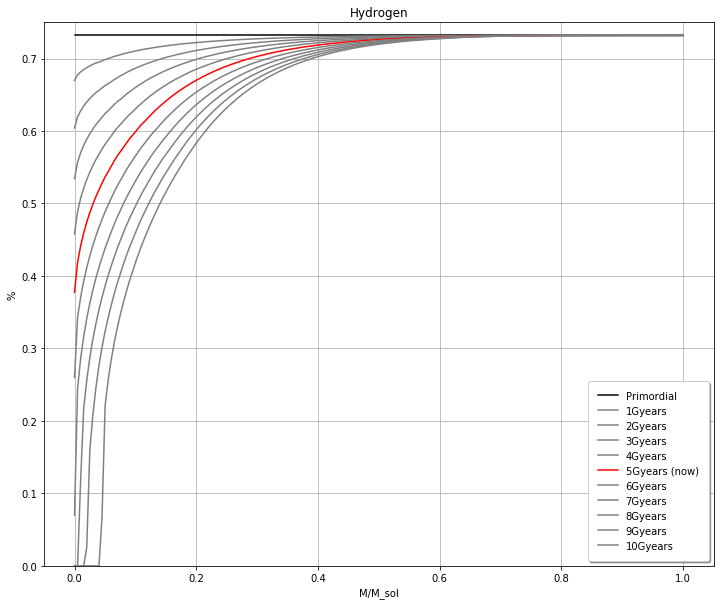

In [830]:
x = np.linspace(0,1,200)
plt.figure(figsize=(12, 10))
ax = plt.axes()
plt.plot(x, xmt[:,0], color='black', label='Primordial')
plt.plot(x, xmt[:,1], color='gray', label='1Gyears')
plt.plot(x, xmt[:,2], color='gray', label='2Gyears')
plt.plot(x, xmt[:,3], color='gray', label='3Gyears')
plt.plot(x, xmt[:,4], color='gray', label='4Gyears')
plt.plot(x, xmt[:,5], color='red', label='5Gyears (now)')
plt.plot(x, xmt[:,6], color='gray', label='6Gyears')
plt.plot(x, xmt[:,7], color='gray', label='7Gyears')
plt.plot(x, xmt[:,8], color='gray', label='8Gyears')
plt.plot(x, xmt[:,9], color='gray', label='9Gyears')
plt.plot(x, xmt[:,10], color='gray', label='10Gyears')
# plt.plot(x, xmt[:,11], color='gray', label='11Gyears')
# plt.xlim(0,.75)
plt.ylim(0,.75)
plt.xlabel('M/M_sol')
plt.ylabel('%')
plt.title('Hydrogen')
ax.grid(b=True, which='both')
ax.legend(fancybox=True, framealpha=1, shadow=True, borderpad=1);


### Temperature - Density

Zeld/epoch00.csv
Zeld/epoch01.csv
Zeld/epoch02.csv
Zeld/epoch03.csv
Zeld/epoch04.csv
Zeld/epoch05.csv
Zeld/epoch06.csv
Zeld/epoch07.csv
Zeld/epoch08.csv
Zeld/epoch09.csv


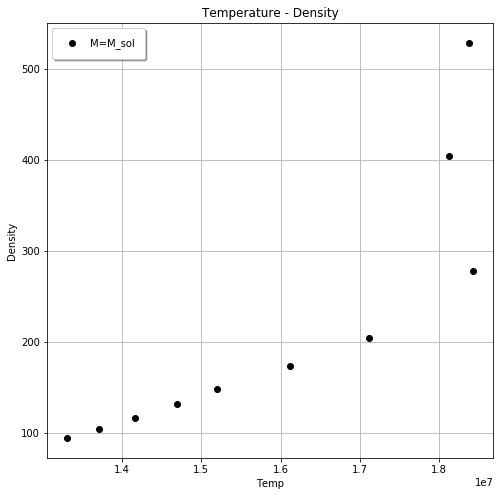

In [66]:
tt = np.zeros(10)
dd = np.zeros(10)

for e in range(10):
    filename = 'Zeld/epoch0%d.csv' % e
    print(filename)
    df = pd.read_csv(filename)
    tt[e] = df['Temperature'][0]
    dd[e] = df['Density'][0]
plt.figure(figsize=(8, 8))
ax = plt.axes()
plt.scatter(tt, dd, color='black', label='M=M_sol')

# plt.plot(x, xmt[:,11], color='gray', label='11Gyears')
# plt.xlim(0,.75)
# plt.ylim(0,.75)
plt.xlabel('Temp')
plt.ylabel('Density')
plt.title('Temperature - Density')
ax.grid(b=True, which='both')
ax.legend(fancybox=True, framealpha=1, shadow=True, borderpad=1);

In [9]:

# # Интерполяция содержания водорода для данной массы
# def XYZ(M, Z=0.02, dimM=200, j=epoch) :
#     i = int(M*dimM)
#     if i > dimM - 1 :
#         i = dimM - 1
#     X = xmt[i, j]
#     return (X, 1-Z-X, Z)

def XYZ_std(M, Z=0.02) :
    for i in range(len(Mstd) - 1) :
        if M <= Mstd[i+1] :
            X = Xstd[i] + (M - Mstd[i])/(Mstd[i+1] - Mstd[i])*(Xstd[i+1] - Xstd[i])
            return (X, 1-Z-X, Z)
    X = Xstd[-1]
    return (X, 1-Z-X, Z)

def MU(X, Y, Z) :
    return  1/(2*X + 3/4*Y + 1/2*Z)

# Табличные данные для функции непрозрачности
Tst = [2120000.,  2720000.,  3400000.,  4640000.,  6030000.,
    7270000.,  8000000.,  8770000.,  9600000., 10200000., 10800000.,
   11400000., 12400000., 13800000., 14800000., 15500000.]
Kst = [9.94082840e+01, 3.60946746e+01,
   1.03492885e+01, 1.64912281e+00, 4.35865504e-01, 1.73913043e-01,
   1.08597285e-01, 7.14285714e-02, 4.93506494e-02, 3.93873085e-02,
   3.17164179e-02, 2.53164557e-02, 1.77439797e-02, 1.20259019e-02,
   8.96191187e-03, 7.03774792e-03]
def kappa(den, T, X, Y, Z) :
    if T <= Tst[0] :
        return den*Kst[0]*T/Tst[0]
    for i in range(len(Tst) - 1) :
        if T <= Tst[i+1] :
            return den*(Kst[i] + (T - Tst[i])/(Tst[i+1] - Tst[i])*(Kst[i+1] - Kst[i]))
    return den*Kst[-1]

In [10]:
XYZ(0.55)

(0.732, 0.248, 0.02)

In [11]:
# Уравнение состояния 
def Pressure(den, T, X, Y, Z) :
    mu = 1/(2*X + 3/4*Y + 1/2*Z)
    return den/m_prot/mu*kB*T

In [12]:
# Зельдович, стр 70, 71:
# Скорость энерговыделения в p-p реакции [эрг/с/г] деленная на X
def E0pp(den, T, X) :
    T0 = (1e6, 5e6, 10e6, 15e6, 20e6, 30e6)
    e0 = (4e-9, 1.8e-3, 6.8e-2, 0.377, 1.09, 4.01)
    n = (10.6, 5.95, 4.60, 3.95, 3.64, 3.03)
    found = False
    for i in range (len(T0) - 1) :
        if T < pow(T0[i]*T0[i+1], 0.5) :
            found = True
            break;
        if not found :
            i = len(T0) - 1
    # print('i=%d T0=%.1e e0=%.3e n=%.2f' % (i, T0[i], e0[i], n[i]))
    return den*X*e0[i]*pow(T/T0[i], n[i])

# Скорость энерговыделения в CNO цикле [эрг/с/г] деленная на X
def E0cno(den, T, XCNO) :
    T0 = (6e6, 10e6, 15e6, 20e6, 30e6, 50e6, 100e6)
    e0 = (9e-10, 3.4e-4, 1.94, 4.5e2, 4.1e5, 6.2e8, 1.9e12)
    n = (27.3, 22.9, 19.9, 18.0, 15.6, 13.6, 10.2)
    found = False
    for i in range (len(T0) - 1) :
        if T < pow(T0[i]*T0[i+1], 0.5) :
            found = True
            break;
    if not found :
        i = len(T0) - 1 
    # print('i=%d T0=%.1e e0=%.3e n=%.2f' % (i, T0[i], e0[i], n[i]))
    return den*XCNO*e0[i]*pow(T/T0[i], n[i])

# Полное энерговыделение - домножаем на X.
def Etot(den, T, X, Y, Z) :
    return X*(E0pp(den, T, X) + E0cno(den, T, Z))
# For best fit to SSM18:
#     return 1.3*E0pp(den, T, X) + 3.5*E0cno(den, T, Z)

## Интегрирование от центра по расстоянию
параметры модели: плотность и температура в центре.

хим.состав, число точек, шаг по радиусу.

In [13]:
def model_R(den0, T0, Z=0.02, dim=30000, dimM=200, step=R_sol/10000, debug=False) :
    dr = step  
    # distance from the center
    r = np.zeros(dim, dtype='float64')
    # density
    d = np.zeros(dim, dtype='float64')
    # temperature
    t = np.zeros(dim, dtype='float64')
    # светимость
    l = np.zeros(dim, dtype='float64')
    # mass inside r
    m = np.zeros(dim, dtype='float64')
    # pressure
    p = np.zeros(dim, dtype='float64')
    # hydrogen
    x = np.zeros(dim, dtype='float64')
    # opacity
    k = np.zeros(dim, dtype='float64')
    # 1 - convection, 0 - radiation
    conv = np.zeros(dim)
    
# начальные данные
    
    # Step 1:
    for n in range(2) :
        r[n] = 10*n*dr
        d[n] = den0
        t[n] = T0
        V = 4*pi/3*pow(r[n], 3)
        m[n] = V*d[n]
        X, Y, Z = XYZ(m[n]/M_sol) # !!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!
        x[n] = X
        mu = MU(X, Y, Z)
        l[n] = m[n]*Etot(d[n], t[n], X, Y, Z)
        p[n] = Pressure(d[n], t[n], X, Y, Z)
        k[n] = kappa(d[n], t[n], X, Y, Z)
# Ckeck for convection:
        Tgrad = k[n]*d[n]*l[n]/(4*a*c*pow(t[n], 3))
        cond = 8*pi/15*G*m_prot*mu/kB
        if debug :
            print(X, Y, Z, mu)
            print("Center: Tgrad=%.4e cond=%.4e" % (Tgrad, cond))
        if Tgrad > cond :
            conv[n] = 1
        else :
            conv[n] = 0
        if debug :
            print('Center: pressure=%e opacity=%.3f X=%.3f mu=%.5f' % (p[n], k[n], X, mu))
            if conv[n]:
                print("Convection")
            else:
                print("Radiation")
    warn = True
    for n in range(1, dim - 1) :
        X, Y, Z = XYZ(m[n]/M_sol)
        mu = MU(X, Y, Z)
        x[n] = X
        r[n+1] = r[n] + dr 
        S = 4*pi*r[n]*r[n]
        g = G*m[n]/r[n]/r[n]
        dp = -g*d[n]*dr
        p[n+1] = p[n] + dp
        k[n] = kappa(d[n], t[n], X, Y, Z)
        if debug :
            print('n=%d r/R_sol=%.4f m/M_sol=%.4f k=%.3f den=%.2f T=%.3e' % (n, r[n]/R_sol, m[n]/M_sol, k[n], d[n], t[n]))
        dt = -3/16*k[n]*d[n]*l[n]/sigma/pow(t[n], 3)/S*dr
        if dt < -2/5*g*m_prot*mu/kB*dr : # Условие конвекции
            dTconv = 2/5*t[n]/p[n]*dp
            if conv[n] == 0:
                if debug :
                    print("Begin convection zone at R=%.3f" % (r[n]/R_sol))
                    print("dT=%e porog=%e n=%d dtConv=%e" % (dt, -2/5*g*m_prot*mu/kB*dr, n, dTconv))
            conv[n+1] = 1
            dt = dTconv
        else :
            if conv[n] :
                if debug:
                    print("End convection zone at R=%.3f" % (r[n]/R_sol))
            conv[n+1] = 0
        
        t[n+1] = t[n] + dt
        # Находим плотность из уравнения состояния
        d[n+1] = mu*m_prot*p[n+1]/kB/t[n+1]
        davg = 0.5*(d[n] + d[n+1])
        tavg = 0.5*(t[n] + t[n+1])
        m[n+1] = m[n] + S*dr*davg
        l[n+1] = l[n] + S*dr*davg*Etot(davg, tavg, X, Y, Z)
        # уменьшаем шаг если температура падает слишком резко
        if abs(dt/t[n]) > 1e-3 :
            dr = 0.7*dr
#         if abs(dt/t[n]) < 0.5e-3 :
#             dr = 1.1*dr
        if m[n]/M_sol > 1.2 : # !!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!
            raise Exception('Mass exceeded 1.2*M_sol')
        Tsur = pow(l[n]/sigma/S, 1/4)
        if t[n] < Tsur :
            break
        if p[n] < 0. : 
#             print ('Negative Pressure')
            break

    if (n == dim - 2) :
         raise Exception("Error, increase dim!")
    
  # Проверка поверхностной температуры:
    if debug :
        Tsur = pow(l[n]/4/pi/sigma/r[n]/r[n], 1/4)
        print('Tsur=%.0f T=%.0f' % (Tsur, t[n]))
    
    mas = np.zeros(dimM)
    rad = np.zeros(dimM)
    tem = np.zeros(dimM)
    den = np.zeros(dimM)
    lum = np.zeros(dimM)
    hyd = np.zeros(dimM)
    opa = np.zeros(dimM)
    pre = np.zeros(dimM)
    con = np.zeros(dimM)
    tau = np.zeros(dimM)
    iprev = -1
    for j in range(n+1) :
        i = int(m[j]/m[n]*dimM)
        if i == dimM :
            i = dimM - 1
        if i > iprev :
            iprev = i
            count = 0
            sd = 0.
            sl = 0.
            sh = 0.
            so = 0.
            sp = 0.
            sc = 0.
        mas[i] = m[n]*(i+1)/dimM
        rad[i] = r[j]
        tem[i] = t[j]
        hyd[i] = xmt[i, epoch]
        count += 1
        sd += d[j]
        sl += l[j]
#         sh += x[j]
        so += k[j]
        sp += p[j]
        sc += conv[j]
        den[i] = sd/count
        lum[i] = sl/count
#         hyd[i] = sh/count
        opa[i] = so/count
        pre[i] = sp/count
        con[i] = sc/count
        tau[i] = dEpp/4/m_prot/(E0pp(den[i], tem[i], hyd[i]) + E0cno(den[i], tem[i], 0.02))/year  # время выгорания водорода в данном слое (в годах)
    den[0] = d[0]
    rad[0] = r[0]
    tem[0] = t[0]
    pre[0] = p[0]
    tem[-1] = t[n]
    rad[-1] = r[n]
    df = pd.DataFrame({'Mass':mas, 'Radius':rad, 'Temperature':tem, 'Density':den, 'Luminosity':lum, 'Hydrogen':hyd, 'Opacity':opa, 'Convection':con, 'Tau':tau})
    return (n, m[n], r[n], l[n], t[n], df)

In [14]:
T0=1.33100e+07 
den0=94.4276738800
# T0 = (13.31)*1e6
# den0 = 95
n, M, R, L, T, df = model_R(den0, T0, debug=False)
n, M/M_sol, R/R_sol, L/L_sol, T

Exception: Error, increase dim!

In [17]:
T0=1.33000e+07 
den0=94.4000000000
n, M, R, L, T, df = model_R(den0, T0, debug=False)
n, M/M_sol, R/R_sol, L/L_sol, T

Exception: Error, increase dim!

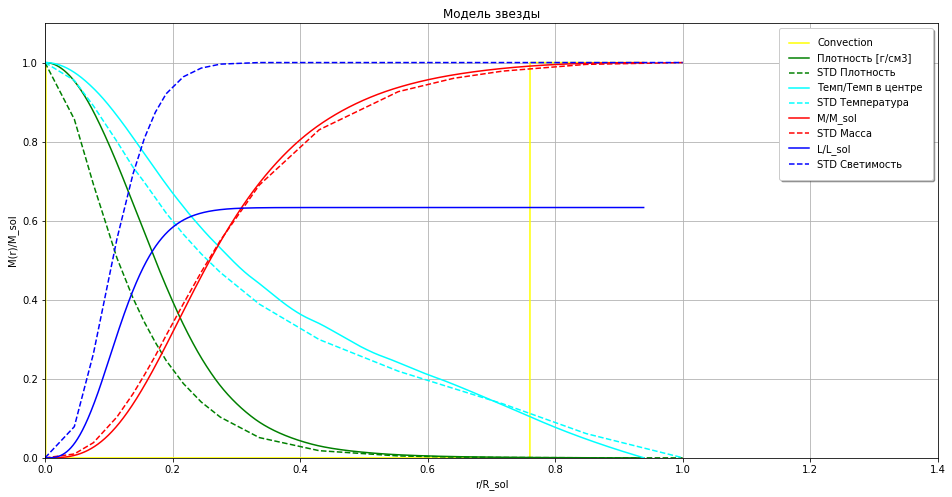

In [505]:
plt.figure(figsize=(16, 8))
ax = plt.axes()
plt.plot(data[0]/R_sol, data[7], color='yellow', label='Convection')
plt.plot(data[0]/R_sol, data[1]/den0, color='green', label='Плотность [г/см3]')
plt.plot(r1, den1/156.3, '--', color='green', label='STD Плотность')
plt.plot(data[0]/R_sol, data[2]/T0, color='cyan', label='Темп/Темп в центре')
plt.plot(r1, T1/15.5e6, '--', color='cyan', label='STD Температура')
plt.plot(data[0]/R_sol, data[3]/M_sol, color='red', label='M/M_sol')
plt.plot(r1, M1, '--', color='red', label='STD Масса')
# plt.plot(data[0]/R_sol, data[4]/data[4][0], color='gray', label='Давл/Давл в центре')
plt.plot(data[0]/R_sol, data[5]/L_sol, color='blue', label='L/L_sol')
plt.plot(r1, L1, '--', color='blue', label='STD Светимость')
plt.xlim(0, 1.4)
plt.ylim(0, 1.1)
plt.xlabel('r/R_sol')
plt.ylabel('M(r)/M_sol')
plt.title('Модель звезды')
ax.grid(b=True, which='both')

ax.legend(fancybox=True, framealpha=1, shadow=True, borderpad=1);

In [622]:
_ = df.to_csv(line_terminator='\n')
csv_file = open("Zeld/epoch03.csv", "wt")
n = csv_file.write(_)
csv_file.close()

In [64]:
df1 = pd.read_csv('Zeld/epoch00.csv')